# SERIGNE DAME GADIAGA MAM3

<h1>Fashion MNIST</h1>

Zalando à mis à disposition est un ensemble de données d'images d'articles, composé 60 000 exemples. 

Chaque exemple est une image en niveaux de gris 28x28.

![](https://miro.medium.com/max/1400/1*RNBs0OsymwAzDyYMk3_0Aw.jpeg)



## Préambule : les données

Les données sont disponible : https://github.com/zalandoresearch/fashion-mnist

Il est possible de directement importer les datas sous Keras comme ceci.

## Partie 1 - Analyse des données

* Compter le nombre de classes et le nombre d'images par classe.
* Importer les images (avec leur classe), on pourra au choix garder des tableaux 28x28 ou 784 (x1).
* Représenter les 10 premières images avec leur nom de classe en titre.
* On considérant chaque image comme un vecteur de taille 784, représenter en nuage de points les différentes classes dans le syteme d'axe :
    * Les 2 premieres composantes issues de l'analyse en composante principales (ACP)
    * Les 2 premiers axes donnés par l'analyse linéaire discriminante (ALD)
* Représenter en diagramme de paire (dit "pairplot") le nuage de points suivant les 3 axes:
    * Les 3 premieres composantes de l'ACP.
    * Les 3 premiers axes de l'ALD.

In [1]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

2023-12-27 15:45:18.811260: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-27 15:45:18.811402: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
trainX.shape

(60000, 28, 28)

In [3]:
trainX[1,:,:]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [4]:
trainy.shape

(60000,)

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print("Forme des données d'entraînement:", trainX.shape)
print("Forme des étiquettes d'entraînement:", trainy.shape)
print("Forme des données de test:", testX.shape)
print("Forme des étiquettes de test:", testy.shape)


Forme des données d'entraînement: (60000, 28, 28)
Forme des étiquettes d'entraînement: (60000,)
Forme des données de test: (10000, 28, 28)
Forme des étiquettes de test: (10000,)


In [6]:
import numpy as np
num_classes = len(np.unique(trainy))
print("Nombre de classes :", num_classes)
images_par_classe = [np.sum(trainy == i) for i in range(num_classes)]
for i in range(num_classes):
    print(f"Classe {i}: {images_par_classe[i]} images")

Nombre de classes : 10
Classe 0: 6000 images
Classe 1: 6000 images
Classe 2: 6000 images
Classe 3: 6000 images
Classe 4: 6000 images
Classe 5: 6000 images
Classe 6: 6000 images
Classe 7: 6000 images
Classe 8: 6000 images
Classe 9: 6000 images


In [7]:
trainX_flat = trainX.reshape((trainX.shape[0], -1))
testX_flat = testX.reshape((testX.shape[0], -1))
print("Forme des données d'entraînement (784) :", trainX_flat.shape)
print("Forme des données de test (784) :", testX_flat.shape)
trainX_28x28 = trainX
testX_28x28 = testX
print("Forme des données d'entraînement (28x28) :", trainX_28x28.shape)
print("Forme des données de test (28x28) :", testX_28x28.shape)
print("Forme des étiquettes d'entraînement :", trainy.shape)
print("Forme des étiquettes de test :", testy.shape)

Forme des données d'entraînement (784) : (60000, 784)
Forme des données de test (784) : (10000, 784)
Forme des données d'entraînement (28x28) : (60000, 28, 28)
Forme des données de test (28x28) : (10000, 28, 28)
Forme des étiquettes d'entraînement : (60000,)
Forme des étiquettes de test : (10000,)


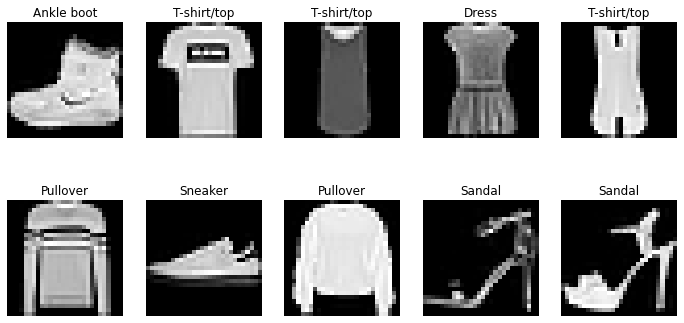

In [8]:
import matplotlib.pyplot as plt
(trainX, trainy), (_, _) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(class_names[trainy[i]])
    plt.axis('off')
plt.show()

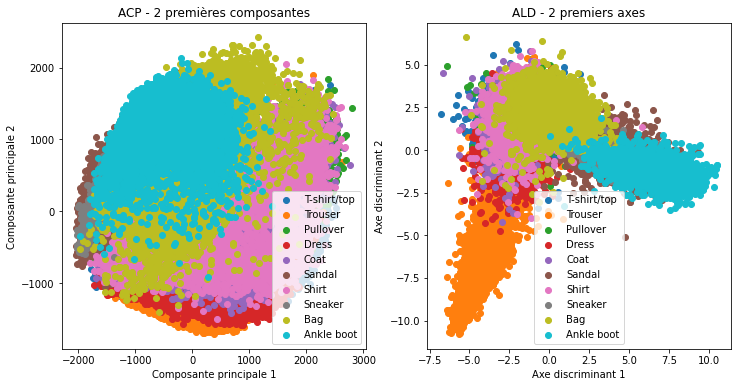

In [10]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.datasets import fashion_mnist
(trainX, trainy), (_, _) = fashion_mnist.load_data()
X_flat = trainX.reshape((trainX.shape[0], -1))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_flat, trainy)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(10):
    plt.scatter(X_pca[trainy == i, 0], X_pca[trainy == i, 1], label=class_names[i])
plt.title('ACP - 2 premières composantes')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.subplot(1, 2, 2)
for i in range(10):
    plt.scatter(X_lda[trainy == i, 0], X_lda[trainy == i, 1], label=class_names[i])
plt.title('ALD - 2 premiers axes')
plt.xlabel('Axe discriminant 1')
plt.ylabel('Axe discriminant 2')
plt.legend()
plt.show()

/tmp/ipykernel_18085/2048673844.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


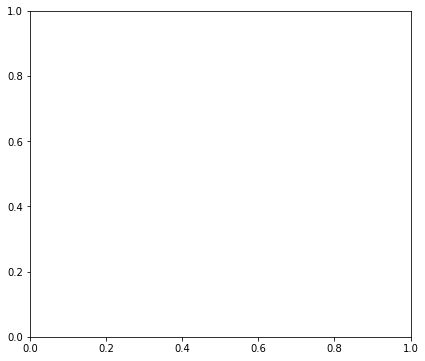

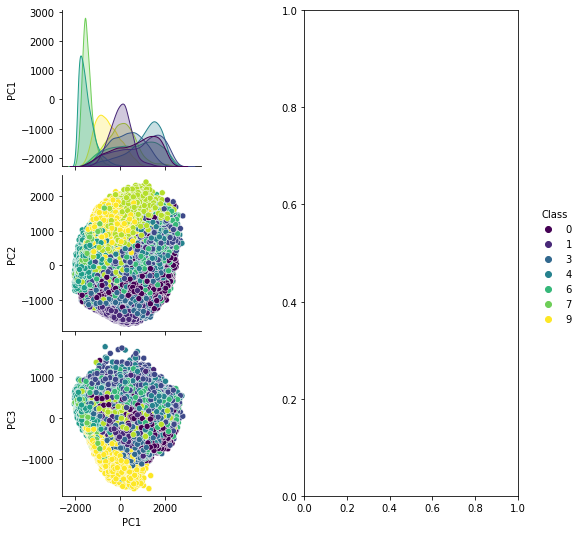

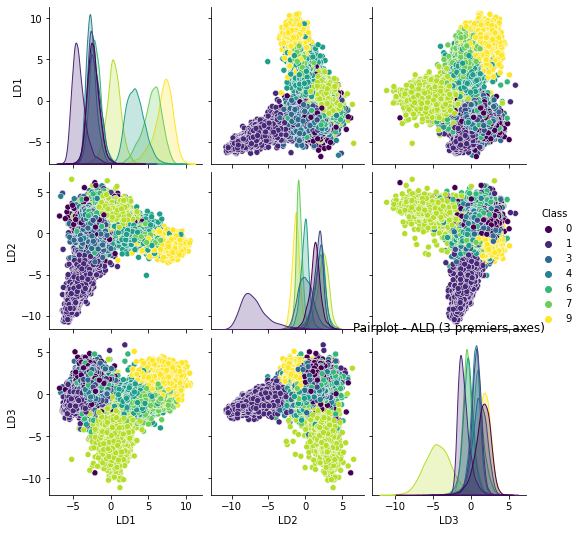

In [12]:
import seaborn as sns
(trainX, trainy), (_, _) = fashion_mnist.load_data()
X_flat = trainX.reshape((trainX.shape[0], -1))
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_flat)
lda_3d = LinearDiscriminantAnalysis(n_components=3)
X_lda_3d = lda_3d.fit_transform(X_flat, trainy)
import pandas as pd
df_pca = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_lda = pd.DataFrame(data=X_lda_3d, columns=['LD1', 'LD2', 'LD3'])
df_pca['Class'] = trainy
df_lda['Class'] = trainy
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.pairplot(df_pca, hue='Class', palette='viridis')
plt.title('Pairplot - ACP (3 premières composantes)')
plt.subplot(1, 2, 2)
sns.pairplot(df_lda, hue='Class', palette='viridis')
plt.title('Pairplot - ALD (3 premiers axes)')
plt.show()

 
   
   
**Conseil : mettez au point votre code avec par exemple seulement 1000 images et en dernier lieu avec la totalité**

## Partie 2 - Classification par Réseau Dense

* Proposer une modèle avec 2 couches cachées (éviter le sur-apprentissage !)
* Tracer les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations.
* Afficher ou tracer la matrice de confusion obtenue.
* Représenter tout (ou partie si >10) des cas de mauvaise prédiction, avec classe prédite et classe exacte en titre.

2023-11-21 14:27:10.762021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-21 14:27:10.762134: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-21 14:27:10.762210: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (newtown): /proc/driver/nvidia/version does not exist


Epoch 1/50
750/750 [==============================] - 10s 12ms/step - loss: 0.8742 - accuracy: 0.6960 - val_loss: 0.4643 - val_accuracy: 0.8316
Epoch 2/50
750/750 [==============================] - 8s 11ms/step - loss: 0.5980 - accuracy: 0.7905 - val_loss: 0.4203 - val_accuracy: 0.8463
Epoch 3/50
750/750 [==============================] - 8s 11ms/step - loss: 0.5485 - accuracy: 0.8071 - val_loss: 0.4039 - val_accuracy: 0.8510
Epoch 4/50
750/750 [==============================] - 8s 11ms/step - loss: 0.5219 - accuracy: 0.8144 - val_loss: 0.3873 - val_accuracy: 0.8528
Epoch 5/50
750/750 [==============================] - 8s 11ms/step - loss: 0.4949 - accuracy: 0.8268 - val_loss: 0.3861 - val_accuracy: 0.8535
Epoch 6/50
750/750 [==============================] - 7s 10ms/step - loss: 0.4811 - accuracy: 0.8338 - val_loss: 0.3749 - val_accuracy: 0.8625
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4695 - accuracy: 0.8366 - val_loss: 0.3680 - val_accuracy: 0.8642

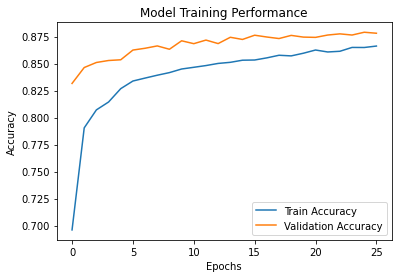

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
(trainX, trainy), (_, _) = fashion_mnist.load_data()
X_flat = trainX.reshape((trainX.shape[0], -1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)
y_onehot = to_categorical(trainy)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/50
750/750 [==============================] - 9s 12ms/step - loss: 0.3824 - accuracy: 0.8643 - val_loss: 0.3351 - val_accuracy: 0.8761
Epoch 2/50
750/750 [==============================] - 8s 10ms/step - loss: 0.3799 - accuracy: 0.8634 - val_loss: 0.3419 - val_accuracy: 0.8748
Epoch 3/50
750/750 [==============================] - 8s 11ms/step - loss: 0.3740 - accuracy: 0.8651 - val_loss: 0.3417 - val_accuracy: 0.8726
Epoch 4/50
750/750 [==============================] - 8s 10ms/step - loss: 0.3762 - accuracy: 0.8660 - val_loss: 0.3333 - val_accuracy: 0.8792
Epoch 5/50
750/750 [==============================] - 8s 10ms/step - loss: 0.3691 - accuracy: 0.8665 - val_loss: 0.3311 - val_accuracy: 0.8777
Epoch 6/50
750/750 [==============================] - 8s 11ms/step - loss: 0.3756 - accuracy: 0.8644 - val_loss: 0.3363 - val_accuracy: 0.8786
Epoch 7/50
750/750 [==============================] - 8s 11ms/step - loss: 0.3680 - accuracy: 0.8684 - val_loss: 0.3333 - val_accuracy: 0.8760

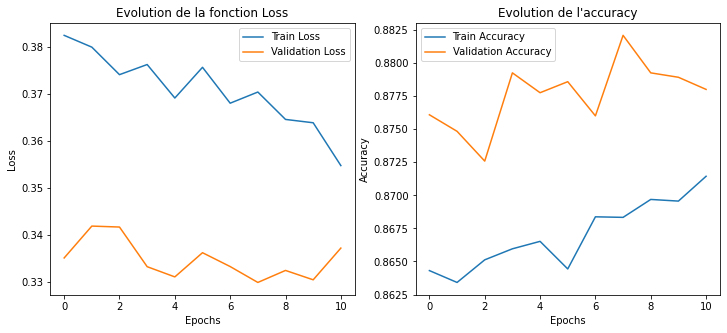

In [12]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Evolution de la fonction Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Evolution de l\'accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 576x576 with 0 Axes>

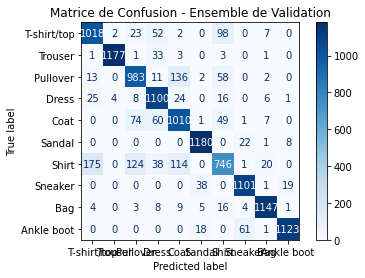

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de Confusion - Ensemble de Validation')
plt.show()

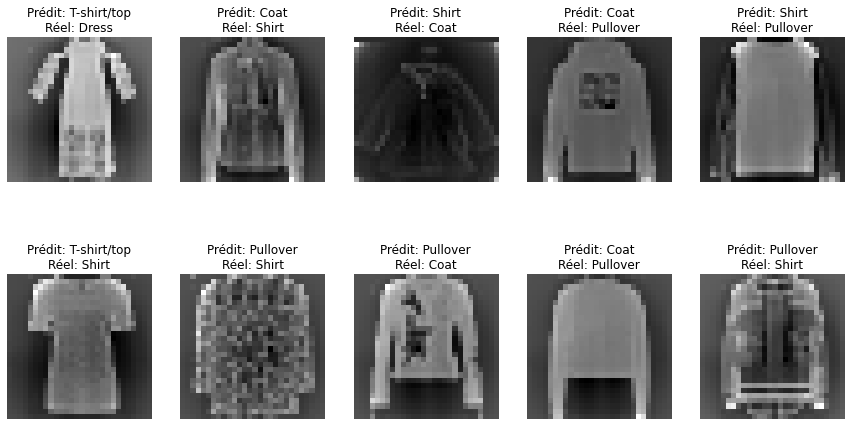

In [14]:
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
misclassified_indices = np.where(y_val_pred_classes != y_val_true_classes)[0]
num_samples_to_display = min(10, len(misclassified_indices))
plt.figure(figsize=(15, 8))
for i in range(num_samples_to_display):
    plt.subplot(2, 5, i + 1)
    index = misclassified_indices[i]
    plt.imshow(X_val[index].reshape(28, 28), cmap='gray')
    plt.title(f'Prédit: {class_names[y_val_pred_classes[index]]}\nRéel: {class_names[y_val_true_classes[index]]}')
    plt.axis('off')
plt.show()

## Partie 3 - Classification par réseau neuronal convolutif (CNN)


* Proposer une modèle dit réseau neuronal convolutif (toujours éviter le sur-apprentissage !)
* Tracer les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations.
* Afficher ou tracer la matrice de confusion obtenue.
* Représenter tout (ou partie si >10) des cas de mauvaise prédiction, avec classe prédite et classe exacte en titre.

Epoch 1/50
750/750 [==============================] - 33s 43ms/step - loss: 0.9527 - accuracy: 0.6469 - val_loss: 0.6409 - val_accuracy: 0.7553
Epoch 2/50
750/750 [==============================] - 30s 40ms/step - loss: 0.6597 - accuracy: 0.7497 - val_loss: 0.5498 - val_accuracy: 0.7809
Epoch 3/50
750/750 [==============================] - 26s 35ms/step - loss: 0.5992 - accuracy: 0.7739 - val_loss: 0.5092 - val_accuracy: 0.8060
Epoch 4/50
750/750 [==============================] - 29s 38ms/step - loss: 0.5661 - accuracy: 0.7886 - val_loss: 0.4814 - val_accuracy: 0.8223
Epoch 5/50
750/750 [==============================] - 27s 36ms/step - loss: 0.5333 - accuracy: 0.7985 - val_loss: 0.4616 - val_accuracy: 0.8220
Epoch 6/50
750/750 [==============================] - 28s 38ms/step - loss: 0.5135 - accuracy: 0.8095 - val_loss: 0.4323 - val_accuracy: 0.8332
Epoch 7/50
750/750 [==============================] - 29s 38ms/step - loss: 0.4955 - accuracy: 0.8146 - val_loss: 0.4197 - val_accuracy:

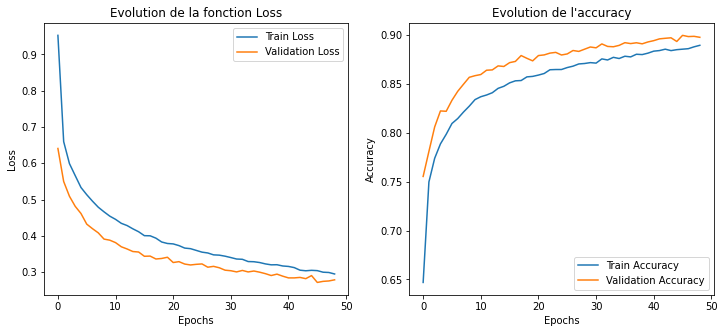

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
(trainX, trainy), (_, _) = fashion_mnist.load_data()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(trainX.reshape(-1, 28 * 28)).reshape(trainX.shape + (1,))
X_scaled = X_scaled / 255.0  
y_onehot = to_categorical(trainy)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolution de la fonction Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evolution de l\'accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/50
750/750 [==============================] - 23s 30ms/step - loss: 0.3000 - accuracy: 0.8850 - val_loss: 0.2778 - val_accuracy: 0.8991
Epoch 2/50
750/750 [==============================] - 21s 28ms/step - loss: 0.2968 - accuracy: 0.8886 - val_loss: 0.2775 - val_accuracy: 0.9002
Epoch 3/50
750/750 [==============================] - 22s 29ms/step - loss: 0.2967 - accuracy: 0.8888 - val_loss: 0.2672 - val_accuracy: 0.9034
Epoch 4/50
750/750 [==============================] - 23s 30ms/step - loss: 0.2925 - accuracy: 0.8900 - val_loss: 0.2733 - val_accuracy: 0.9003
Epoch 5/50
750/750 [==============================] - 23s 31ms/step - loss: 0.2895 - accuracy: 0.8906 - val_loss: 0.2736 - val_accuracy: 0.8992
Epoch 6/50
750/750 [==============================] - 22s 29ms/step - loss: 0.2919 - accuracy: 0.8899 - val_loss: 0.2810 - val_accuracy: 0.8989


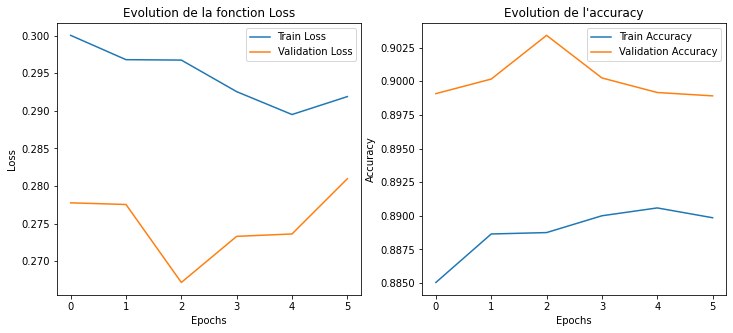

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Evolution de la fonction Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Evolution de l\'accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 576x576 with 0 Axes>

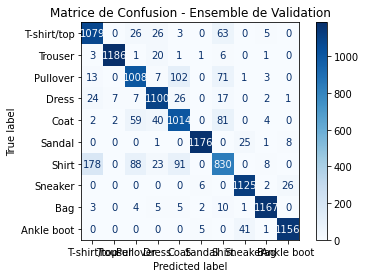

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de Confusion - Ensemble de Validation')
plt.show()

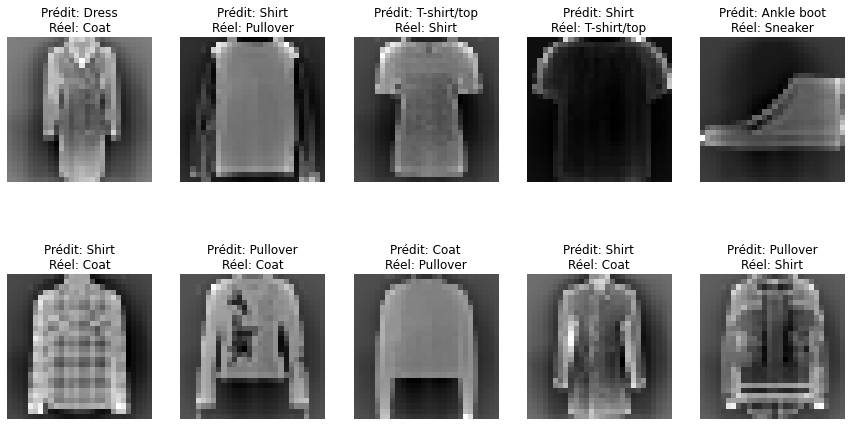

In [18]:
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
misclassified_indices = np.where(y_val_pred_classes != y_val_true_classes)[0]
num_samples_to_display = min(10, len(misclassified_indices))
plt.figure(figsize=(15, 8))
for i in range(num_samples_to_display):
    plt.subplot(2, 5, i + 1)
    index = misclassified_indices[i]
    plt.imshow(X_val[index].reshape(28, 28), cmap='gray')
    plt.title(f'Prédit: {class_names[y_val_pred_classes[index]]}\nRéel: {class_names[y_val_true_classes[index]]}')
    plt.axis('off')

plt.show()

## Partie 4

Analyser et conclure.

Le modèle de réseau neuronal convolutif que nous avons développé a démontré une convergence satisfaisante, avec une diminution de la fonction de perte et une augmentation de l'exactitude sur l'ensemble de validation au fil des époques. La matrice de confusion révèle une performance globalement solide, avec des confusions limitées entre certaines classes. L'analyse des échantillons mal classés suggère que le modèle peut avoir des difficultés avec des cas présentant des similarités visuelles. Des ajustements potentiels, tels que l'augmentation des données ou la modification de l'architecture du modèle, pourraient être envisagés pour améliorer davantage la performance. En conclusion, ce modèle CNN offre une base solide, mais des itérations supplémentaires pourraient être nécessaires pour atteindre une performance optimale.